In [1]:
%pip install plotly
%pip install dash
#!pip install rembgp

In [2]:
# Necessary imports

from PIL import Image, ImageDraw, ImageFont,  ImageColor,ImageFilter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from rembg import remove
import cv2
import plotly.express as px
import plotly.graph_objs as go
import dash
from dash.dependencies import State
from dash import Dash, dcc, html, Input, Output, no_update, callback
import random
import base64
import os,sys
import json


# Image and Coordinates

(496, 496)


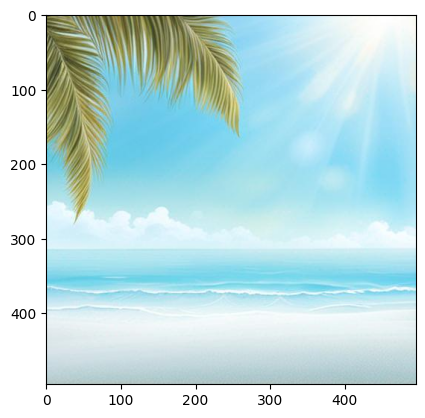

In [3]:
image_path = r"DEMO\generated\beach_bannerbg03_1X1_500.jpg"  # Replace with the actual file path
img = Image.open(image_path,"r")
print(img.size)
plt.imshow(img)
plt.axis()  #"off"
plt.show()


In [15]:
# Coordinates

fig = px.imshow(img)
fig.update_layout(dragmode="drawrect")

app = Dash(__name__)
app.layout = html.Div(
    [
        html.H3("Select a region to see its characteristics"),
        dcc.Graph(id="graph-picture", figure=fig),
        dcc.Markdown("Characteristics of shapes"),
        html.Pre(id="annotations-data"),
    ]
)
shape_characteristics = {}
@callback(
    Output("annotations-data", "children"),
    Input("graph-picture", "relayoutData"),
    prevent_initial_call=True,
)

#data = {}
def on_new_annotation(relayout_data):
  if "shapes" in relayout_data:

      relayoutdata = json.dumps(relayout_data["shapes"], indent=2)

      return relayoutdata
  else:
      return no_update

if __name__ == "__main__":
    app.run(debug=True)


In [16]:
# template_trial
data = [
  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0, 0, 0, 0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 415.509814453125,
    "y0": -0.0803466796875,
    "x1": 495.5,
    "y1": 63.9196533203125
  },
  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0,0,0,0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 232.30981445312497,
    "y0": 198.3196533203125,
    "x1": 472.30981445312494,
    "y1": 430.3196533203125
  },
  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0,0,0,0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 24.309814453124996,
    "y0": 83.1196533203125,
    "x1": 342.7098144531249,
    "y1": 223.9196533203125
  },
  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0,0,0,0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 33.909814453124994,
    "y0": 327.9196533203125,
    "x1": 182.70981445312498,
    "y1": 379.1196533203125
  }
]
# ********************** Function to get random coordinate for different Elements of banner  *******************
class CoordinateUtils:
    @staticmethod
    def alignmentCoorMid(data):
        mid_coors_point = {}
        Coor_key= ["logo_area","image_area","content_area", "clickable_area"]
        for j in range(len(Coor_key)):
            x0,y0,x1,y1 = data[j]['x0'],data[j]['y0'],data[j]['x1'],data[j]['y1']
            if x0 > x1:
                x0,x1 = x1,x0
            if y0 > y1:
                y0,y1 = y1,y0
            mid_x = (x0 + x1) / 2
            mid_y = (y0 + y1) / 2
            mid_x, mid_y = max(mid_x, 0), max(mid_y, 0)
            mid_x, mid_y = int(mid_x), int(mid_y)
            mid_coors_point[Coor_key[j]] = (mid_x,mid_y)
        return mid_coors_point

    @staticmethod
    def alignmentCoorTopLeft(data):
        topleft_point = {}
        Coor_key= ["logo_area","image_area","content_area", "clickable_area"]
        for j in range(len(Coor_key)):
            x0,y0,x1,y1 = data[j]['x0'],data[j]['y0'],data[j]['x1'],data[j]['y1']
            if x0 > x1:
                x0,x1 = x1,x0
            if y0 > y1:
                y0,y1 = y1,y0
            top_left_x = x0
            top_left_y = y0
            top_left_x,top_left_y = max(top_left_x, 0), max(top_left_y, 0)
            top_left_x,top_left_y = int(top_left_x), int(top_left_y)
            topleft_point[Coor_key[j]] = (top_left_x,top_left_y)
        return topleft_point

    @staticmethod
    def coordinateValues(data):
        coors = {}
        Coor_key= ["logo_area","image_area","content_area", "clickable_area"]
        for j in range(len(Coor_key)):
            x0,y0,x1,y1 = data[j]['x0'],data[j]['y0'],data[j]['x1'],data[j]['y1']
            coors[Coor_key[j]] = {'x0':x0,'y0': y0,'x1':x1, 'y1': y1}
        return coors


### pattern logo area, Image area,Content area, clickable area



# Usage
coordinate_utils = CoordinateUtils()
mid_coors_point = coordinate_utils.alignmentCoorMid(data)
topleft_point = coordinate_utils.alignmentCoorTopLeft(data)
coors = coordinate_utils.coordinateValues(data)

print(topleft_point)

{'logo_area': (415, 0), 'image_area': (232, 198), 'content_area': (24, 83), 'clickable_area': (33, 327)}


# Class for Banner Creation

In [13]:
class BannerCreator:
    def __init__(self, background_image_path, coords):
        # Open the background image
        try:
            self.background_image = Image.open(background_image_path)
        except FileNotFoundError:
            print(f"Error: Background image file not found at '{background_image_path}'.")
            raise

        # Validate and store coordinates
        if not isinstance(coords, dict):
            raise TypeError("Invalid argument type for `coords`. Expected a dictionary.")
        for key in ("logo_area", "image_area", "content_area", "clickable_area"):
            if key not in coords or not isinstance(coords[key], tuple):
                raise ValueError(f"Missing or invalid entry for '{key}' in `coords`.")
        self.coords = coords

    def attach_logo(self, logo_path):
        def erode(cycles, image):
            for _ in range(cycles):
                image = image.filter(ImageFilter.MinFilter(3))
            return image
        def dilate(cycles, image):
            for _ in range(cycles):
                image = image.filter(ImageFilter.MaxFilter(3))
            return image
        
        if logo_path == "DEMO\Product_suscreen\joy-logo.png":
            # Open the logo image
            
            try:
                logo = Image.open(logo_path).convert("RGB")
            except FileNotFoundError:
                print(f"Error: Logo image file not found at '{logo_path}'.")
                raise

            red, green,blue = logo.split()
            threshold = 30
            img_th2 = blue.point(lambda x: 255 if x < threshold else 0)
            img_th2= img_th2.convert("1")
            step_1 = erode(1, img_th2)
            step_1 = step_1.point(lambda x: 0 if x == 255 else 255)
            mask = erode(2, step_1)
            mask = mask.convert("L")
            mask = mask.filter(ImageFilter.BoxBlur(5))
            # Resize the logo based on area definition
            resize_image = logo.resize((logo.width // 7, logo.height // 7))
            resize_mask = mask.resize((mask.width // 7, mask.height // 7))

        elif logo_path == r"DEMO\Product_suscreen\nivea_logo.png":
            # Open the logo image
            
            try:
                logo = Image.open(logo_path).convert("RGB")
            except FileNotFoundError:
                print(f"Error: Logo image file not found at '{logo_path}'.")
                raise
            logo = logo.crop((70,40,190,160))
            red, green,blue = logo.split()
            threshold = 100
            img_th2 = red.point(lambda x: 255 if x > threshold else 0)
            img_th2= img_th2.convert("1")
            step_1 = erode(1, img_th2)
            step_1 = step_1.point(lambda x: 0 if x == 255 else 255)
            step_2 = dilate(3,step_1)
            mask = erode(2, step_2)
            mask = mask.convert("L")
            mask = mask.filter(ImageFilter.BoxBlur(5))
            # Resize the logo based on area definition
            resize_image = logo.resize((logo.width// 2, logo.height // 2))
            resize_mask = mask.resize((mask.width // 2, mask.height // 2)) 
        
        # Paste the logo at specified coordinates with offset
        x, y = self.coords["logo_area"][0], self.coords["logo_area"][1]
        self.background_image.paste(resize_image,(x+10, y+10),resize_mask)

    def attach_image(self, image_path):

        # fuctions for Erode and Dilate
        def erode(cycles, image):
            for _ in range(cycles):
                image = image.filter(ImageFilter.MinFilter(3))
            return image
        def dilate(cycles, image):
            for _ in range(cycles):
                image = image.filter(ImageFilter.MaxFilter(3))
            return image



        if image_path == r"DEMO\Product_suscreen\product_sunscreen.jpg" or r"DEMO\Product_suscreen\product_sunscreen.png" :
            # Open the original image 
            image = Image.open(image_path).convert('RGB')
            red, green,blue = image.split()
            threshold = 150
            img_th2 = blue.point(lambda x: 255 if x > threshold else 0)
            img_th2= img_th2.convert("1")


            step_1 = erode(18, img_th2)
            step_1 = step_1.point(lambda x: 0 if x == 255 else 255)
            step_2 = dilate(30,step_1)
            mask = erode(45, step_2)
            mask = mask.convert("L")
            mask = mask.filter(ImageFilter.BoxBlur(15))
            blank = image.point(lambda _: 0)
            segmented = Image.composite(image, blank,mask)
            resize_image = image.resize((image.width // 2, image.height // 2))
            resize_mask = mask.resize((mask.width // 2, mask.height // 2))
            
            x, y = self.coords["image_area"][0], self.coords["image_area"][1]
            self.background_image.paste(resize_image,(x,y),resize_mask,)

        elif image_path == r"DEMO\Product_suscreen\sunscreen_nivea02.png" :
            # Open the original image 
            image = Image.open(image_path).convert('RGB')
            # Crop the image if needed
            #image = image.crop((390,80,610,610))
            # resize the image
            #image = image.resize((image.width // 2, image.height // 2))
            red, green,blue = image.split()
            threshold = 250
            img_th2 = green.point(lambda x: 255 if x < threshold else 0)
            img_th2= img_th2.convert("1")


            step_1 = erode(5, img_th2)
            step_2 = dilate(15,step_1)
            mask = erode(6, step_2)
            mask = mask.convert("L")
            mask = mask.filter(ImageFilter.BoxBlur(20))

            resize_image = image.resize((image.width// 2, image.height // 2))
            resize_mask = mask.resize((mask.width // 2, mask.height // 2))
            x, y = self.coords["image_area"][0], self.coords["image_area"][1]
            self.background_image.paste(resize_image,(x,y),resize_mask,)
        
        elif image_path == r"DEMO\Product_suscreen\Product_sunscreen03.jpg" :
            # Open the original image 
            image = Image.open(image_path).convert('RGB')
            # Crop the image if needed
            image = image.crop((300,60,700,940))
            # split the colors RGB
            red, green,blue = image.split()
            threshold = 250
            img_th2 = green.point(lambda x: 255 if x < threshold else 0)
            img_th2= img_th2.convert("1")


            step_1 = erode(3, img_th2)
            step_2 = dilate(12,step_1)
            mask = erode(3, step_2)
            mask = mask.convert("L")
            mask = mask.filter(ImageFilter.BoxBlur(20))
            blank = image.point(lambda _: 0)

            resize_image = image.resize((image.width// 3, image.height // 3))
            resize_mask = mask.resize((mask.width // 3, mask.height // 3))

            x, y = self.coords["image_area"][0], self.coords["image_area"][1]
            self.background_image.paste(resize_image,(x,y),resize_mask,)

        else:
            print("Image not found!")        
        
        # Paste the image at specified coordinates
            


    def attach_content(self, text, text_font_path, size_font ,text_color=(0, 0, 0)):
        # Validate text and font path
        if not isinstance(text, str):
            raise TypeError("Invalid type for `text`. Expected a string.")
        if not os.path.isfile(text_font_path):
            raise FileNotFoundError(f"Font file not found at '{text_font_path}'.")

        # Load the font and draw the text
        font_size = size_font
        font = ImageFont.truetype(text_font_path, size= font_size)
        x, y = self.coords["content_area"][0], self.coords["content_area"][1]
        draw = ImageDraw.Draw(self.background_image)
        draw.text((x, y), text, font=font, fill=text_color)

    def attach_clickable_area(self,text_font_path, text=u"Shop Now", text_color=(0,0,0)):
        # Validate text and font path
        if not isinstance(text, str):
            raise TypeError("Invalid type for `text`. Expected a string.")
        if not os.path.isfile(text_font_path):
            raise FileNotFoundError(f"Font file not found at '{text_font_path}'.")

        # Define area and rectangle properties
        x, y, = self.coords["clickable_area"]
        w, h = 170, 50
        draw = ImageDraw.Draw(self.background_image)
        draw.rectangle([(x, y), (x + w, y + h)], outline=(0, 0, 0), width=2)

        # Load the font and draw the text inside the rectangle
        font = ImageFont.truetype(text_font_path, size=30)
        draw.text((x + 5, y + 5), text, fill=text_color, font=font)

    def create_banner(self, filename):
        # Save the banner to a file
        self.background_image.save(filename)

    # Display the banner to a file (if desired)
    def display_canvas(self):
        plt.imshow(self.background_image)
        plt.title("")
        plt.axis("off")
        plt.show()
      

Input 1:
background_image_path =  r"DEMO\generated\beach_bannerbg03.jpg"
coords ={'logo_area': (0, 0), 
                'image_area': (470, 130), 
                'content_area': (28, 125), 
                'clickable_area': (128, 369)
                }
image_path = r"DEMO\Product_suscreen\product_sunscreen.png"
logo_path = r"DEMO\Product_suscreen\joy-logo.png"
output_filename = r"output\Demo_test.png"

Input2:
background_image_path =  r"DEMO\generated\beach_bannerbg03_1X1_500.jpg"
coords = {'logo_area': (415, 0), 
          'image_area': (232, 198), 
          'content_area': (24, 83), 
          'clickable_area': (33, 327)}

image_path = r"DEMO\Product_suscreen\sunscreen_nivea02_r.png"
logo_path = r"DEMO\Product_suscreen\nivea_logo.png"
output_filename = r"output\Demo02_test.png"


Banner created successfully! You can find it at 'output\Demo03_test.png'.


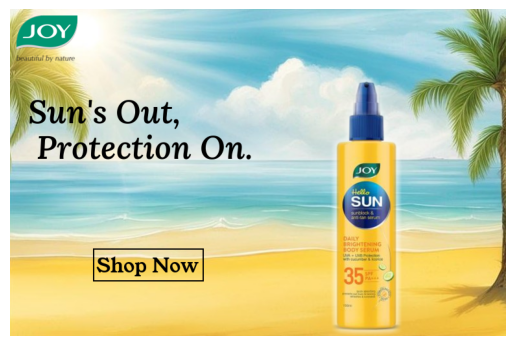

In [14]:


background_image_path =   r"DEMO\generated\beach_bannerbg04.jpg"

coords = {'logo_area': (0, 0), 
            'image_area': (300, 50), 
            'content_area': (28, 125), 
            'clickable_area': (128, 369)
            }

image_path = r"DEMO\Product_suscreen\Product_sunscreen03.jpg"
logo_path = r"DEMO\Product_suscreen\joy-logo.png"
output_filename = r"output\Demo03_test.png"

# Create the BannerCreator object
banner_creator = BannerCreator(background_image_path, coords)

# Add the product image
banner_creator.attach_image(image_path)

# Add the logo and text content
banner_creator.attach_logo(logo_path)
banner_creator.attach_content(
    text="Sun's Out, \n Protection On.",
    text_font_path=r"assets\fonts\Lora-SemiBoldItalic.ttf",
    size_font= 50 
)

# Add the clickable area with custom text
banner_creator.attach_clickable_area(
    text="Shop Now",
    text_font_path=r"assets\fonts\YoungSerif-Regular.ttf"
)

# Save the final banner
banner_creator.create_banner(output_filename)

print(f"Banner created successfully! You can find it at '{output_filename}'.")
banner_creator.display_canvas()


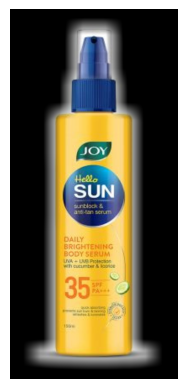

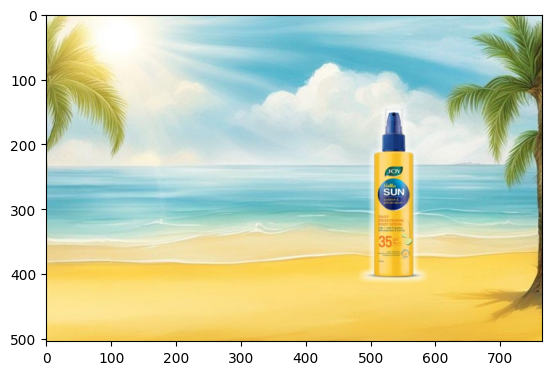

In [5]:
def erode(cycles, image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MinFilter(3))
  return image


def dilate(cycles, image):
  for _ in range(cycles):
    image = image.filter(ImageFilter.MaxFilter(3))
  return image

image_path = r"DEMO\Product_suscreen\Product_sunscreen03.jpg"

if image_path == r"DEMO\Product_suscreen\Product_sunscreen03.jpg" :
  # Open the original image 
  image = Image.open(image_path).convert('RGB')
  # Crop the image if needed
  image = image.crop((300,60,700,940))
  # split the colors RGB
  red, green,blue = image.split()
  threshold = 250
  img_th2 = green.point(lambda x: 255 if x < threshold else 0)
  img_th2= img_th2.convert("1")


  step_1 = erode(3, img_th2)
  step_2 = dilate(12,step_1)
  mask = erode(3, step_2)
  mask = mask.convert("L")
  mask = mask.filter(ImageFilter.BoxBlur(20))
  blank = image.point(lambda _: 0)

  resize_image = image.resize((image.width// 3, image.height // 3))
  resize_mask = mask.resize((mask.width // 3, mask.height // 3))
  

    
org_file= r"DEMO\generated\beach_bannerbg04.jpg"
with Image.open(org_file) as org:
     org.load()
     
org.paste(
    resize_image,
    (470, 130),
    resize_mask,)

plt.imshow(org)
plt.axis()
plt.show()


In [ ]:
  segmented = Image.composite(image, blank,mask)
  plt.imshow(segmented)
  plt.axis("off")
  plt.show()

# Template_trail.py


In [ ]:
# template_trail
# *********************** Function to create blank canvas for banner **************************
class Canvas:
    def __init__(self, width, height, mode, color):
        self.width = width
        self.height = height
        self.mode = mode
        self.color = color

    def create_canvas(self):
        self.img = Image.new(mode=self.mode, size=(self.width, self.height), color=self.color)

    def save_canvas(self, filename):
        self.img.save(filename)

    def display_canvas(self):
        plt.imshow(self.img)
        plt.axis('off')
        plt.show()



##Get input from the user
width = int(input("Enter width: "))
height = int(input("Enter height: "))
mode = input("Enter mode (e.g. RGB, RGBA, CMYK): ")
color = tuple(map(int, input("Enter color as three space-separated integers (e.g. 223 227 216): ").split()))


# Create an instance of the Canvas class
canvas = Canvas(width, height, mode, color)

# Create the canvas
canvas.create_canvas()

# Save the canvas to a file
filename = input("Enter output file name: ") #95.25_01.png
canvas.save_canvas("output\{}".format(filename))

# Display the canvas
canvas.display_canvas()

In [ ]:
# template_trial

# ********************** Function to paste logo into the defined area of banner  *******************

# Background removal
def process_image(input,filename):
    output= remove(input)
    #output.save('output_bgremoval\{}'.format())
    return output

# Creating function to paste thumbnail logo into the defined area of banner

def logoAreaAttach(random_point,canvas,filename):
    # Open the image
    img = Image.open(r"Input_images\logo.jpg")
    if img.mode in ("RGBA", "P"):
        img = img.convert("RGB")

    # Resize the image

    img.thumbnail((random.randint(50, 100), random.randint(50, 100)))
    img =img.resize()
    # Paste the image
    xi,yi = int(random_point["logo_area"][0]+2),int(random_point["logo_area"][1]+2)
    canvas.paste(img, (xi,yi))
    # Save the canvas to a file
    canvas.save(filename)
    return canvas



In [ ]:
# Creating function to paste Product image into the defined area of banner

def imageAreaAttach(random_point,input_file,filename):
    # Open the image
    img = Image.open(r"Input_images\sunscreen.jpg")
    if img.mode in ("RGBA", "P"):
      img = img.convert("RGB")

    # Resize the image
    fix = 150
    img=img.resize((fix,fix))

    # Paste the image
    xi,yi =  int(random_point['image_area'][0]),int(random_point['image_area'][1])
    canvas.paste(img, (xi,yi))

    # Save the canvas to a file
    canvas.save(filename)
    return canvas




In [ ]:
# Creating function to paste Text content into the defined area of banner
def contentAreaAttach(random_point,input_file,filename):

    # Open the image
    image = Image.open(input_file)

    # Specify the text to be added
    text = " Product \n Content \n Test"

    # Set the font, scale, color, and thickness of the text
    font = ImageFont.Truetype(r'assets\fonts\TiltNeon-Regular-VariableFont_XROT,YROT.ttf', size=50)
    color = 'white'  # RGB format

    # Generate random coordinates
    x, y = int(random_point['content_area'][0]),int(random_point['content_area'][1])

    # Add the text to the image
    draw = ImageDraw.Draw(image)
    draw.text((x, y), text, font=font, fill=(0,0,0))

    # Save the image
    image.save(filename)

    return image



In [ ]:
# Creating function to paste Shop now into the defined area of banner
def clickableAreaAttach(random_point, image_path, filename):
    # Open the image
    image = Image.open(image_path)

    # Create a rectangle box
    x, y, w, h = random_point[0], random_point[1], 150, 50
    draw = ImageDraw.Draw(image)
    draw.rectangle([(x, y), (x + w, y + h)], outline=(0, 0, 0), width=1)

    # Add text inside the box
    text = u"Shop Now"
    font = ImageFont.Truetype(r"assets\fonts\Lora-Medium.ttf", 30)  # Replace "arial.ttf" with the path to your desired font file
    """    text_size_x,text_size_y = draw.getsize(text, font=font)
    text_x = x + (w - text_size_x) // 2
    text_y = y + (h - text_size_y) // 2"""
    draw.text((x+5,y+5), text, fill=(26, 110, 129), font=font)

    # Save the image
    image.save(filename)

    # Return the modified image
    return image




In [ ]:
# Usage
coordinate_utils = CoordinateUtils()
mid_coors_point = coordinate_utils.alignmentCoorMid(data)
topleft_point = coordinate_utils.alignmentCoorTopLeft(data)
coors = coordinate_utils.coordinateValues(data)

canvas =Image.open(r"DEMO\97_25_05.png")
points = topleft_point
logoAreaAttach(points,canvas,filename="DEMO\97_25_05_l.png")


imageAreaAttach(points,input_file ="DEMO\97_25_05_l.png",filename = "DEMO\97_25_05_li.png")
contentAreaAttach(points,input_file = "DEMO\97_25_05_li.png",filename="DEMO\97_25_05_lic.png")
clickableAreaAttach(random_point=points["clickable_area"],image_path="DEMO\97_25_05_lic.png",filename="DEMO\97_25_05_final.png")

In [ ]:
#Image_prep


import cv2
import numpy as np
from PIL import Image,ImageDraw, ImageFilter
import matplotlib.pyplot as plt


# Load the image
img = cv2.imread("Input_images\images (1).jpg")
cv2.imshow('Image', img)

# Split the image into RGB channels
b, g, r = cv2.split(img)

# Display the individual channels
cv2.imshow('Blue Channel', b)
cv2.imshow('Green Channel', g)
cv2.imshow('Red Channel', r)



# Converting color mode to Grayscale
# as thresholding requires a single channeled image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Apply thresholding to each channel
_, blue_thresholded = cv2.threshold(b, 127, 255, cv2.THRESH_BINARY)
_, green_thresholded = cv2.threshold(g, 127, 255, cv2.THRESH_BINARY)
_, red_thresholded = cv2.threshold(r, 127, 255, cv2.THRESH_BINARY)

# Combine the thresholded channels into a single image
thresholded_image = cv2.merge((blue_thresholded, green_thresholded, red_thresholded))
thresholded_image = cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB)
cv2.imshow('Thresholded_image',thresholded_image )


#cv2.imwrite("output\bags_gray.jpg", img)

#cv2.imshow('Image', th1)


# Waits for a keystroke
cv2.waitKey(0)

# Destroys all the windows created
cv2.destroyAllwindows()

In [ ]:
#  Copy Paste The Output of the above code here

data = [

  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0, 0, 0, 0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 37.253807806199596,
    "y0": 60.00764514553931,
    "x1": -0.5,
    "y1": -0.5
  },
  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0,0,0,0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 57.576388451360884,
    "y0": 110.3302257907006,
    "x1": 249.18929167716732,
    "y1": 205.16893546811994
  },
  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0,0,0,0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 76.9312271610383,
    "y0": 361.94312901650704,
    "x1": 237.57638845136086,
    "y1": 414.20119353263607
  },
  {
    "editable": True,
    "visible": True,
    "showlegend": False,
    "legend": "legend",
    "legendgroup": "",
    "legendgrouptitle": {
      "text": ""
    },
    "legendrank": 1000,
    "label": {
      "text": "",
      "texttemplate": ""
    },
    "xref": "x",
    "yref": "y",
    "layer": "above",
    "opacity": 1,
    "line": {
      "color": "#444",
      "width": 4,
      "dash": "solid"
    },
    "fillcolor": "rgba(0,0,0,0)",
    "fillrule": "evenodd",
    "type": "rect",
    "x0": 20.80219490297379,
    "y0": 476.1366774036038,
    "x1": 285.9634852255544,
    "y1": 567.1044193390877
  }
]

## data = json.dumps(data, indent=2)
#print(data)

In [ ]:

# Usage
coordinate_utils = CoordinateUtils()
mid_coors_point = coordinate_utils.alignmentCoorMid(data)
topleft_point = coordinate_utils.alignmentCoorTopLeft(data)
coors = coordinate_utils.coordinateValues(data)

canvas =Image.open(r"DEMO\97_25_05.png")
points = topleft_point
logoAreaAttach(points,canvas,filename="DEMO\97_25_05_l.png")


imageAreaAttach(points,input_file ="DEMO\97_25_05_l.png",filename = "DEMO\97_25_05_li.png")
contentAreaAttach(points,input_file = "DEMO\97_25_05_li.png",filename="DEMO\97_25_05_lic.png")
clickableAreaAttach(random_point=points["clickable_area"],image_path="DEMO\97_25_05_lic.png",filename="DEMO\97_25_05_final.png")

